# Deep Learning with Keras 
________________________

### Prepare and process the data

- Each datapoint in dataset is also called sample or input data
- Labels = target data
  - positive / negative
  - cat / dog
- We'll use a sequential model, what type of data format does it need for x and y? -> Check options tf.keras Sequential in documentation
  - x = samples in Numpy array format
  - y = targets in Numpy array format


In [2]:
import tensorflow as tf
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [3]:
train_samples = []
train_labels =  []

### Example data

- An experiemental drug was tested on individuals from ages 13 to 100.
- The trial had 2100 participants. Half were under 65 years old, half were over 65 years old.
- 95% of patients 65 or older experienced side effects.
- 95% of patients under 65 experienced no side effects.

In [4]:
for i in range(50):
    # The 5% of younger individuals who did experience side effects
    random_younger = randint(13,64) # generate a random number between 13 and 64
    train_samples.append(random_younger)
    train_labels.append(1) # 1 = side effects
    
    # The 5% of older individuals who did not experience side effects
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(0) # 0 = no side effects

for i in range(1000):
    # The 95% of younger individuals who did not experience side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)
    
    # The 95% of older individuals who did experience side effects
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(1)

In [5]:
print(train_samples[150:160])
print(train_labels[150:160])

[24, 93, 55, 65, 19, 91, 59, 75, 49, 81]
[0, 1, 0, 1, 0, 1, 0, 1, 0, 1]


In [6]:
train_samples = np.array(train_samples)
train_labels = np.array(train_labels)
train_labels, train_samples = shuffle(train_labels, train_samples)

In [7]:
scaler = MinMaxScaler(feature_range=(0,1)) # scale the 13-100 age to 0-1
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1)) 
#reshape(-1,1) is a formality, fit transform does not accept 1D data, we have to reshape it in this way to be able to pass it to the fit_transform function

In [8]:
print(train_samples[150:160])
print(scaled_train_samples[150:160])

[ 28  21  83  86  17  82  86 100  91  83]
[[0.17241379]
 [0.09195402]
 [0.8045977 ]
 [0.83908046]
 [0.04597701]
 [0.79310345]
 [0.83908046]
 [1.        ]
 [0.89655172]
 [0.8045977 ]]


### Simple sequential model

In [9]:
#libraries for building the model
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense

#libraries for training the model
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

In [10]:
# input_shape=(1,) -> through this the model understands the shape of the input data (format it it expects)
model = Sequential([
    Dense(16, input_shape=(1,), activation='relu'), #16 is arbitrarily chosen #this Dense layer is the first hidden layer, not the input layer
    Dense(32, activation='relu'), #32 is arbitrarily chosen
    Dense(2, activation='softmax') #2 possible output classes (side effects / no side effects), softmax gives output probability for each class
]) 

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [12]:
#compile: prepares the model for training
model.compile(optimizer=Adam(learning_rate=.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
#training
model.fit(scaled_train_samples,
          train_labels,
          batch_size=10, #number of samples in 1 batch to be passed and processed by the network
          epochs=20, #the model is going to process or train on all of the data in the dataset 20 times before completing the training
          shuffle=True, #by default it's already on True -> we want any order in the dataset to be erased before we pass it to the model, so that it doesn't learn this
          verbose=2) #option to allow us to see output from fit funtion, 2 gives most messages

#The batch size defines the number of samples that will be propagated through the network.
#For instance, let's say you have 1050 training samples and you want to set up a batch_size equal to 100. 
#The algorithm takes the first 100 samples (from 1st to 100th) from the training dataset and trains the network. 
#Next, it takes the second 100 samples (from 101st to 200th) and trains the network again. 
#We can keep doing this procedure until we have propagated all samples through of the network. 
#Problem might happen with the last set of samples. 
#In our example, we've used 1050 which is not divisible by 100 without remainder. 
#The simplest solution is just to get the final 50 samples and train the network.

Epoch 1/20
210/210 - 2s - loss: 0.7147 - accuracy: 0.3529 - 2s/epoch - 11ms/step
Epoch 2/20
210/210 - 1s - loss: 0.6813 - accuracy: 0.5224 - 713ms/epoch - 3ms/step
Epoch 3/20
210/210 - 1s - loss: 0.6522 - accuracy: 0.5957 - 667ms/epoch - 3ms/step
Epoch 4/20
210/210 - 1s - loss: 0.6255 - accuracy: 0.6633 - 688ms/epoch - 3ms/step
Epoch 5/20
210/210 - 1s - loss: 0.6018 - accuracy: 0.6962 - 690ms/epoch - 3ms/step
Epoch 6/20
210/210 - 1s - loss: 0.5709 - accuracy: 0.7524 - 590ms/epoch - 3ms/step
Epoch 7/20
210/210 - 1s - loss: 0.5309 - accuracy: 0.8162 - 614ms/epoch - 3ms/step
Epoch 8/20
210/210 - 1s - loss: 0.4975 - accuracy: 0.8381 - 678ms/epoch - 3ms/step
Epoch 9/20
210/210 - 1s - loss: 0.4667 - accuracy: 0.8538 - 691ms/epoch - 3ms/step
Epoch 10/20
210/210 - 1s - loss: 0.4385 - accuracy: 0.8733 - 690ms/epoch - 3ms/step
Epoch 11/20
210/210 - 1s - loss: 0.4133 - accuracy: 0.8781 - 660ms/epoch - 3ms/step
Epoch 12/20
210/210 - 1s - loss: 0.3911 - accuracy: 0.8871 - 672ms/epoch - 3ms/step
Epo

### Creating a validation set on the fly 

- add parameter validation_split=0.1 to model.fit
- the validation part of data is not used in the training process
- CAUTION:
    - the train / validation split occurs before the shuffle part, this means that the validation part is not shuffled! 
    - this is the reason why we shuffled before passing the data to the fit function 

In [14]:
#training
model.fit(scaled_train_samples,
          train_labels,
          validation_split=0.1,
          batch_size=10, #number of samples in 1 batch to be passed and processed by the network
          epochs=20, #the model is going to process or train on all of the data in the dataset 30 times before completing the training
          shuffle=True, #by default it's already on True -> we want any order in the dataset to be erased before we pass it to the model, so that it doesn't learn this
          verbose=2) #option to allow us to see output from fit funtion, 2 gives most messages

Epoch 1/20
189/189 - 1s - loss: 0.2870 - accuracy: 0.9217 - val_loss: 0.3849 - val_accuracy: 0.8857 - 1s/epoch - 8ms/step
Epoch 2/20
189/189 - 1s - loss: 0.2831 - accuracy: 0.9275 - val_loss: 0.3879 - val_accuracy: 0.8524 - 801ms/epoch - 4ms/step
Epoch 3/20
189/189 - 1s - loss: 0.2799 - accuracy: 0.9233 - val_loss: 0.3880 - val_accuracy: 0.8524 - 767ms/epoch - 4ms/step
Epoch 4/20
189/189 - 1s - loss: 0.2771 - accuracy: 0.9228 - val_loss: 0.3831 - val_accuracy: 0.8857 - 765ms/epoch - 4ms/step
Epoch 5/20
189/189 - 1s - loss: 0.2744 - accuracy: 0.9243 - val_loss: 0.3818 - val_accuracy: 0.8857 - 790ms/epoch - 4ms/step
Epoch 6/20
189/189 - 1s - loss: 0.2720 - accuracy: 0.9243 - val_loss: 0.3826 - val_accuracy: 0.8857 - 753ms/epoch - 4ms/step
Epoch 7/20
189/189 - 1s - loss: 0.2700 - accuracy: 0.9259 - val_loss: 0.3840 - val_accuracy: 0.8857 - 706ms/epoch - 4ms/step
Epoch 8/20
189/189 - 1s - loss: 0.2683 - accuracy: 0.9243 - val_loss: 0.3835 - val_accuracy: 0.8857 - 722ms/epoch - 4ms/step
Epo

### Predictions (inference)

- hold out a test set from training set
- just for demonstrating inference we generate a new test set here

In [15]:
test_samples = []
test_labels =  []

In [16]:
for i in range(10):
    # The 5% of younger individuals who did experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)
    
    # The 5% of older individuals who did not experience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(0)

for i in range(200):
    # The 95% of younger individuals who did not experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(0)
    
    # The 95% of older individuals who did experience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(1)

In [17]:
test_labels = np.array(test_labels)
test_samples = np.array(test_samples)

In [18]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_test_samples = scaler.fit_transform((test_samples).reshape(-1,1))

In [19]:
predictions = model.predict(x=scaled_test_samples, batch_size=10, verbose=0) 
# [0.9408204  0.05917962] --> ["probability no side effect" "probability side effect"]

In [20]:
rounded_predictions = np.argmax(predictions, axis=-1)
#rounded_predictions = model.predict_classes(scaled_test_samples, batch_size=10, verbose=0)
# 0 --> takes the class with highest probability

### Confusion matrix

In [21]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [22]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [23]:
cm = confusion_matrix(y_true=test_labels, y_pred=rounded_predictions)

Confusion matrix, without normalization
[[189  21]
 [ 10 200]]


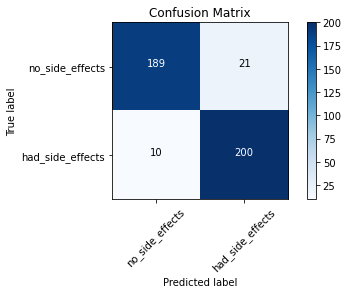

In [24]:
cm_plot_labels = ['no_side_effects','had_side_effects']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

### Saving and loading the model

#### option 1: model.save()

In [25]:
import os.path

In [26]:
os.chdir('c:\\Users\\robin\\Documents\\Keras\\Keras-DeepLizard-Course\\')
print(os.getcwd())
if os.path.isdir('models') is False:
    os.makedirs('models')
os.chdir('models')
print(os.getcwd())
if os.path.isfile('medical_trial_model.h5') is False:
    model.save('medical_trial_model.h5')
os.chdir('../')
print(os.getcwd())

c:\Users\robin\Documents\Keras\Keras-DeepLizard-Course
c:\Users\robin\Documents\Keras\Keras-DeepLizard-Course\models
c:\Users\robin\Documents\Keras\Keras-DeepLizard-Course



The .save() functions saves:

    - The architecture of the model (allowing you to re-create the model)
    - The weights of the model.
    - The training configuration (loss, optimizer).
    - The state of the optimizer, allowing to resume training exactly where you left off.

In [27]:
from keras.models import load_model
new_model = load_model('/models/medical_trial_model.h5')

In [28]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [29]:
new_model.get_weights()

[array([[ 0.25963163, -0.07359892, -0.05436987,  0.32195783, -0.34666577,
         -0.47304136, -0.35182777,  0.6199667 ,  0.26072025,  0.151065  ,
          0.33017758,  0.696458  ,  0.22669615,  0.7436711 , -0.3064354 ,
         -0.53128505]], dtype=float32),
 array([-0.0978344 ,  0.        ,  0.        , -0.10508262,  0.        ,
         0.        ,  0.        , -0.13269398, -0.09919395,  0.23927133,
        -0.1103512 , -0.15066111, -0.08869144, -0.16258909,  0.        ,
         0.        ], dtype=float32),
 array([[-9.07480046e-02, -9.85568836e-02,  9.07304585e-02,
          5.38588583e-01,  4.99138325e-01, -2.62430310e-01,
         -3.33489656e-01, -2.53224224e-01, -2.61669934e-01,
          1.71976145e-02,  4.89072919e-01, -2.64467970e-02,
          2.00373694e-01, -1.72172517e-01,  1.60079598e-02,
         -3.29840809e-01,  9.58224162e-02, -9.49283540e-02,
          1.15552641e-01,  9.53737795e-02, -2.81971216e-01,
         -1.93800703e-01,  4.32151049e-01,  2.42127419e-01,
 

In [30]:
#you can see that it uses the Adam optimizer
new_model.optimizer

#### option 2: model.to_json()

    - when you only need to save the model's architecture (and not its weights or its training configuration)


In [31]:
# save as JSON
json_string = model.to_json()

# save as YAML
# yaml_string = model.to_yaml()

In [32]:
json_string

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 1], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_input"}}, {"class_name": "Dense", "config": {"name": "dense", "trainable": true, "dtype": "float32", "batch_input_shape": [null, 1], "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_1", "trainable": true, "dtype": "float32", "units": 32, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_r

In [33]:
# model reconstruction from JSON:
from keras.models import model_from_json
model_architecture = model_from_json(json_string)

# model reconstruction from YAML
# from keras.models import model_from_yaml
# model = model_from_yaml(yaml_string)

In [34]:
model_architecture.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


#### option 3: model.save_weights()

    - When you only need to save the model's weights 



In [35]:
print(os.getcwd())
os.chdir('models')
print(os.getcwd())

c:\Users\robin\Documents\Keras\Keras-DeepLizard-Course
c:\Users\robin\Documents\Keras\Keras-DeepLizard-Course\models


In [36]:
if os.path.isfile('my_model_weights.h5') is False:
  model.save_weights('my_model_weights.h5')
  print('saved the weights')
else:
  print('weights are already saved')

weights are already saved


In [37]:
os.chdir('../')
print(os.getcwd())

c:\Users\robin\Documents\Keras\Keras-DeepLizard-Course


In [38]:
model2 = Sequential([
    Dense(16, input_shape=(1,), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

In [39]:
model2.load_weights('/models/my_model_weights.h5')

In [40]:
model2.get_weights()

[array([[-0.06590518,  0.27860066,  0.723844  , -0.51433194, -0.04160386,
          0.6675093 ,  0.31131768,  0.35954204, -0.06235021, -0.2492392 ,
         -0.1605995 , -0.09958419,  0.5752276 , -0.3950163 , -0.4596653 ,
         -0.3512347 ]], dtype=float32),
 array([ 0.21554369,  0.15753224, -0.07615152,  0.        ,  0.        ,
        -0.15284102, -0.12163703, -0.13444345,  0.21585664,  0.        ,
         0.        ,  0.        , -0.15355569,  0.        ,  0.        ,
         0.        ], dtype=float32),
 array([[-0.19994807, -0.26643145,  0.21491146,  0.16244593, -0.01383277,
         -0.02815654, -0.31407857, -0.19254771, -0.32920608, -0.33968768,
          0.38137248, -0.31537244,  0.28936106,  0.28158742, -0.13972095,
          0.16867043, -0.086099  ,  0.14794515, -0.15754732, -0.12707272,
         -0.20173767, -0.26613432,  0.39846036,  0.09186257,  0.0878027 ,
         -0.03158144,  0.34824836,  0.3056562 ,  0.34801635,  0.41709068,
         -0.17316951, -0.3287342 ],
 